Ben Russell & Bryan Flanagan

Food Sellers & Health Outcomes in U.S Counties

https://bennyboy54.github.io

Food Environment Atlas (https://www.ers.usda.gov/data-products/food-environment-atlas/): This dataset tracks access to food in different areas, different household variables, restaurants and stores, expenditures for food establishments, and income of households by counties in the United States. It was produced in 2020 and largely focuses on data from 2011-2018.

The first dataset we looked at is the “Food Environment Atlas,” produced by the USDA. This dataset includes observations about the access different demographics and households have to food by county in the U.S. Some of the variables include: household income, household food expenditures, and access to food-selling businesses, such as grocery stores or restaurants. One question we hope to answer is how different food security support programs, such as SNAP and WIC, relate to a lack of access to food vendors.

**Milestone 2 Writeup:**

The Food Atlas dataset we are evaluating takes in many parameters when pulling data from a family. Some of these important parameters include the income of the family, their geographical location, their access to food in genres (super market, restuarant, fast food, etc.)

Our first objective was to determine what variables we'd be examining, and what others might have an effect. We began our experiments with food access and insecurity. However, due to vague definitions on what "low access" actually means, we pivoted our approach, favoring to examine health outcomes.

When taking a closer look at health outcomes, we can use data that splits this into two important categories, percentage of the adult population with diabetes and percentage of the adult population that are obese. Compounding both of these variables can give us a good measure of a bad diet. We can use this to look at the correlation between bad diet/health and other variables.

Once important correlation we should examine is a bad diet against access to food from groccery stores or access to convienent stores. This lack of access to certain food vendors could play a large part in how people eat. Based off of logical reasoning we could assume that those with lower access to groccery stores with fresh produce, and healthier foods, probably has higher rates of diabetes or obesity.

Another factor to look at is how overall health and SNAP participants are related. Do healthier people not particiapte in SNAP? Or are there other factors like income that might affect both participation in SNAP and overall health?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In the below cell, we import our data. We are looking at FDA records from every county in the United States cataloging various criteria, mostly revolving around food access and population demographics.

Since there are multiple sheets in the Excel document, we will merge them all into one large dataframe. This makes the data far more accessbile for analysis and testing.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
#food_atlas = pd.ExcelFile('/content/drive/MyDrive/Notability/Data Science/food_atlas_mile_2.xlsx')
food_atlas = pd.ExcelFile('FoodEnvironmentAtlas Mergable.xlsx')
list_dataframes = []

for sheet in food_atlas.sheet_names:
  list_dataframes.append(food_atlas.parse(sheet))
df = pd.concat(list_dataframes, axis=1)
final_df = df.loc[:,~df.columns.duplicated()].copy()
final_df.drop([3143])
final_df.astype({'FIPS':'string'})

,FIPS,County,State,2010_Census_Population,Population_Estimate_2011,Population_Estimate_2012,Population_Estimate_2013,Population_Estimate_2014,Population_Estimate_2015,Population_Estimate_2016,Population_Estimate_2017,Population_Estimate_2018,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,LACCESS_HHNV10,LACCESS_HHNV15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,LACCESS_SNAP15,PCT_LACCESS_SNAP15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,LACCESS_SENIORS10,LACCESS_SENIORS15,PCH_LACCESS_SENIORS_10_15,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,LACCESS_WHITE15,PCT_LACCESS_WHITE15,LACCESS_BLACK15,PCT_LACCESS_BLACK15,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,SUPERC16,PCH_SUPERC_11_16,SUPERCPTH11,SUPERCPTH16,PCH_SUPERCPTH_11_16,CONVS11,CONVS16,PCH_CONVS_11_16,CONVSPTH11,CONVSPTH16,PCH_CONVSPTH_11_16,SPECS11,SPECS16,PCH_SPECS_11_16,SPECSPTH11,SPECSPTH16,PCH_SPECSPTH_11_16,SNAPS12,SNAPS17,PCH_SNAPS_12_17,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16,FFR11,FFR16,PCH_FFR_11_16,FFRPTH11,FFRPTH16,PCH_FFRPTH_11_16,FSR11,FSR16,PCH_FSR_11_16,FSRPTH11,FSRPTH16,PCH_FSRPTH_11_16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12,REDEMP_SNAPS12,REDEMP_SNAPS17,PCH_REDEMP_SNAPS_12_17,PCT_SNAP12,PCT_SNAP17,PCH_SNAP_12_17,PC_SNAPBEN12,PC_SNAPBEN17,PCH_PC_SNAPBEN_12_17,SNAP_PART_RATE11,SNAP_PART_RATE16,SNAP_OAPP09,SNAP_OAPP16,SNAP_CAP09,SNAP_CAP16,SNAP_BBCE09,SNAP_BBCE16,SNAP_REPORTSIMPLE09,SNAP_REPORTSIMPLE16,PCT_NSLP12,PCT_NSLP17,PCH_NSLP_12_17,PCT_FREE_LUNCH10,PCT_FREE_LUNCH15,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PCT_SBP12,PCT_SBP17,PCH_SBP_12_17,PCT_SFSP12,PCT_SFSP17,PCH_SFSP_12_17,PC_WIC_REDEMP11,PC_WIC_REDEMP16,PCH_PC_WIC_REDEMP_11_16,REDEMP_WICS11,REDEMP_WICS16,PCH_REDEMP_WICS_11_16,PCT_WIC12,PCT_WIC17,PCH_WIC_12_17,PCT_WICINFANTCHILD14,PCT_WICINFANTCHILD16,PCH_WICINFANTCHILD_14_16,PCT_WICWOMEN14,PCT_WICWOMEN16,PCH_WICWOMEN_14_16,PCT_CACFP12,PCT_CACFP17,PCH_CACFP_12_17,FDPIR12,FDPIR15,PCH_FDPIR_12_15,FOOD_BANKS18,FOODINSEC_12_14,FOODINSEC_15_17,CH_FOODINSEC_14_17,VLFOODSEC_12_14,VLFOODSEC_15_17,CH_VLFOODSEC_14_17,SODATAX_STORES14,SODATAX_VENDM14,CHIPSTAX_STORES14,CHIPSTAX_VENDM14,FOOD_TAX14,DIRSALES_FARMS07,DIRSALES_FARMS12,PCH_DIRSALES_FARMS_07_12,PCT_LOCLFARM07,PCT_LOCLFARM12,PCT_LOCLSALE07,PCT_LOCLSALE12,DIRSALES07,DIRSALES12,PCH_DIRSALES_07_12,PC_DIRSALES07,PC_DIRSALES12,PCH_PC_DIRSALES_07_12,FMRKT13,FMRKT18,PCH_FMRKT_13_18,FMRKTPTH13,FMRKTPTH18,PCH_FMRKTPTH_13_18,FMRKT_SNAP18,PCT_FMRKT_SNAP18,FMRKT_WIC18,PCT_FMRKT_WIC18,FMRKT_WICCASH18,PCT_FMRKT_WICCASH18,FMRKT_SFMNP18,PCT_FMRKT_SFMNP18,FMRKT_CREDIT18,PCT_FMRKT_CREDIT18,FMRKT_FRVEG18,PCT_FMRKT_FRVEG18,FMRKT_ANMLPROD18,PCT_FMRKT_ANMLPROD18,FMRKT_BAKED18,PCT_FMRKT_BAKED18,FMRKT_OTHERFOOD18,PCT_FMRKT_OTHERFOOD18,VEG_FARMS07,VEG_FARMS12,PCH_VEG_FARMS_07_12,VEG_ACRES07,VEG_ACRES12,PCH_VEG_ACRES_07_12,VEG_ACRESPTH07,VEG_ACRESPTH12,PCH_VEG_ACRESPTH_07_12,FRESHVEG_FARMS07,FRESHVEG_FARMS12,PCH_FRESHVEG_FARMS_07_12,FRESHVEG_ACRES07,FRESHVEG_ACRES12,PCH_FRESHVEG_ACRES_07_12,FRESHVEG_ACRESPTH07,FRESHVEG_ACRESPTH12,PCH_FRESHVEG_ACRESPTH_07_12,ORCHARD_FARMS07,ORCHARD_FARMS12,PCH_ORCHARD_FARMS_07_12,ORCHARD_ACRES07,ORCHARD_ACRES12,PCH_ORCHARD_ACRES_07_12,ORCHARD_ACRESPTH07,ORCHARD_ACRESPTH12,PCH_ORCHARD_ACRESPTH_07_12,BERRY_FARMS07,BERRY_FARMS12,PCH_BERRY_FARMS_07_12,BERRY_ACRES07,BERRY_ACRES12,PCH_BERRY_ACRES_07_12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,PCH_BERRY_ACRESPTH_07_12,SLHOUSE07,SLHOUSE12,PCH_SLHOUSE_07_12,GHVEG_FARMS07,GHVEG_FARMS12,PCH_GHVEG_FARMS_07_12,GHVEG_SQFT07,GHVEG_SQFT12,PCH_GHVEG_SQFT_07_12,GHVEG_SQFTPTH07,GHVEG_SQFTPT

Above, we can see the full table and all of its different columns. As can be seen, there are a great deal of different points of study observed by the dataset. Below are some simple summary statistics for the numerical datatypes within the set.



In [ ]:
numerical_data = final_df.drop(['FIPS','County', 'State', 'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10', 'METRO13', 'POPLOSS10', 'SNAP_OAPP09', 'SNAP_OAPP16', 'SNAP_CAP09',
                                'SNAP_CAP16', 'SNAP_BBCE09','SNAP_BBCE09','SNAP_REPORTSIMPLE09','SNAP_REPORTSIMPLE16','FARM_TO_SCHOOL13','FARM_TO_SCHOOL15'], axis=1)
numerical_data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,2010_Census_Population,Population_Estimate_2011,Population_Estimate_2012,Population_Estimate_2013,Population_Estimate_2014,Population_Estimate_2015,Population_Estimate_2016,Population_Estimate_2017,Population_Estimate_2018,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,LACCESS_HHNV10,LACCESS_HHNV15,PCH_LACCESS_HHNV_10_15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,LACCESS_SNAP15,PCT_LACCESS_SNAP15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,LACCESS_SENIORS10,LACCESS_SENIORS15,PCH_LACCESS_SENIORS_10_15,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,LACCESS_WHITE15,PCT_LACCESS_WHITE15,LACCESS_BLACK15,PCT_LACCESS_BLACK15,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,SUPERC16,PCH_SUPERC_11_16,SUPERCPTH11,SUPERCPTH16,PCH_SUPERCPTH_11_16,CONVS11,CONVS16,PCH_CONVS_11_16,CONVSPTH11,CONVSPTH16,PCH_CONVSPTH_11_16,SPECS11,SPECS16,PCH_SPECS_11_16,SPECSPTH11,SPECSPTH16,PCH_SPECSPTH_11_16,SNAPS12,SNAPS17,PCH_SNAPS_12_17,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16,FFR11,FFR16,PCH_FFR_11_16,FFRPTH11,FFRPTH16,PCH_FFRPTH_11_16,FSR11,FSR16,PCH_FSR_11_16,FSRPTH11,FSRPTH16,PCH_FSRPTH_11_16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12,REDEMP_SNAPS12,REDEMP_SNAPS17,PCH_REDEMP_SNAPS_12_17,PCT_SNAP12,PCT_SNAP17,PCH_SNAP_12_17,PC_SNAPBEN12,PC_SNAPBEN17,PCH_PC_SNAPBEN_12_17,SNAP_PART_RATE11,SNAP_PART_RATE16,SNAP_BBCE16,PCT_NSLP12,PCT_NSLP17,PCH_NSLP_12_17,PCT_FREE_LUNCH10,PCT_FREE_LUNCH15,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PCT_SBP12,PCT_SBP17,PCH_SBP_12_17,PCT_SFSP12,PCT_SFSP17,PCH_SFSP_12_17,PC_WIC_REDEMP11,PC_WIC_REDEMP16,PCH_PC_WIC_REDEMP_11_16,REDEMP_WICS11,REDEMP_WICS16,PCH_REDEMP_WICS_11_16,PCT_WIC12,PCT_WIC17,PCH_WIC_12_17,PCT_WICINFANTCHILD14,PCT_WICINFANTCHILD16,PCH_WICINFANTCHILD_14_16,PCT_WICWOMEN14,PCT_WICWOMEN16,PCH_WICWOMEN_14_16,PCT_CACFP12,PCT_CACFP17,PCH_CACFP_12_17,FDPIR12,FDPIR15,PCH_FDPIR_12_15,FOOD_BANKS18,FOODINSEC_12_14,FOODINSEC_15_17,CH_FOODINSEC_14_17,VLFOODSEC_12_14,VLFOODSEC_15_17,CH_VLFOODSEC_14_17,SODATAX_STORES14,SODATAX_VENDM14,CHIPSTAX_STORES14,CHIPSTAX_VENDM14,FOOD_TAX14,DIRSALES_FARMS07,DIRSALES_FARMS12,PCH_DIRSALES_FARMS_07_12,PCT_LOCLFARM07,PCT_LOCLFARM12,PCT_LOCLSALE07,PCT_LOCLSALE12,DIRSALES07,DIRSALES12,PCH_DIRSALES_07_12,PC_DIRSALES07,PC_DIRSALES12,PCH_PC_DIRSALES_07_12,FMRKT13,FMRKT18,PCH_FMRKT_13_18,FMRKTPTH13,FMRKTPTH18,PCH_FMRKTPTH_13_18,FMRKT_SNAP18,PCT_FMRKT_SNAP18,FMRKT_WIC18,PCT_FMRKT_WIC18,FMRKT_WICCASH18,PCT_FMRKT_WICCASH18,FMRKT_SFMNP18,PCT_FMRKT_SFMNP18,FMRKT_CREDIT18,PCT_FMRKT_CREDIT18,FMRKT_FRVEG18,PCT_FMRKT_FRVEG18,FMRKT_ANMLPROD18,PCT_FMRKT_ANMLPROD18,FMRKT_BAKED18,PCT_FMRKT_BAKED18,FMRKT_OTHERFOOD18,PCT_FMRKT_OTHERFOOD18,VEG_FARMS07,VEG_FARMS12,PCH_VEG_FARMS_07_12,VEG_ACRES07,VEG_ACRES12,PCH_VEG_ACRES_07_12,VEG_ACRESPTH07,VEG_ACRESPTH12,PCH_VEG_ACRESPTH_07_12,FRESHVEG_FARMS07,FRESHVEG_FARMS12,PCH_FRESHVEG_FARMS_07_12,FRESHVEG_ACRES07,FRESHVEG_ACRES12,PCH_FRESHVEG_ACRES_07_12,FRESHVEG_ACRESPTH07,FRESHVEG_ACRESPTH12,PCH_FRESHVEG_ACRESPTH_07_12,ORCHARD_FARMS07,ORCHARD_FARMS12,PCH_ORCHARD_FARMS_07_12,ORCHARD_ACRES07,ORCHARD_ACRES12,PCH_ORCHARD_ACRES_07_12,ORCHARD_ACRESPTH07,ORCHARD_ACRESPTH12,PCH_ORCHARD_ACRESPTH_07_12,BERRY_FARMS07,BERRY_FARMS12,PCH_BERRY_FARMS_07_12,BERRY_ACRES07,BERRY_ACRES12,PCH_BERRY_ACRES_07_12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,PCH_BERRY_ACRESPTH_07_12,SLHOUSE07,SLHOUSE12,PCH_SLHOUSE_07_12,GHVEG_FARMS07,GHVEG_FARMS12,PCH_GHVEG_FARMS_07_12,GHVEG_SQFT07,GHVEG_SQFT12,PCH_GHVEG_SQFT_07_12,GHVEG_SQFTPTH07,GHVEG_SQFTPTH12,PCH_GHVEG_SQFTPTH_07_12,FOODHUB18,CSA07,CSA12,PCH_CSA_07_12,AGRITRSM_OPS07,AGRITRSM_OPS12,PCH_AGRITRSM_OPS_07_12

Below is a heatmap of the variables that we hypothsized may have a relationship with one another. The appropriate correlation will also be supplied for the relevant graph.

<Axes: >

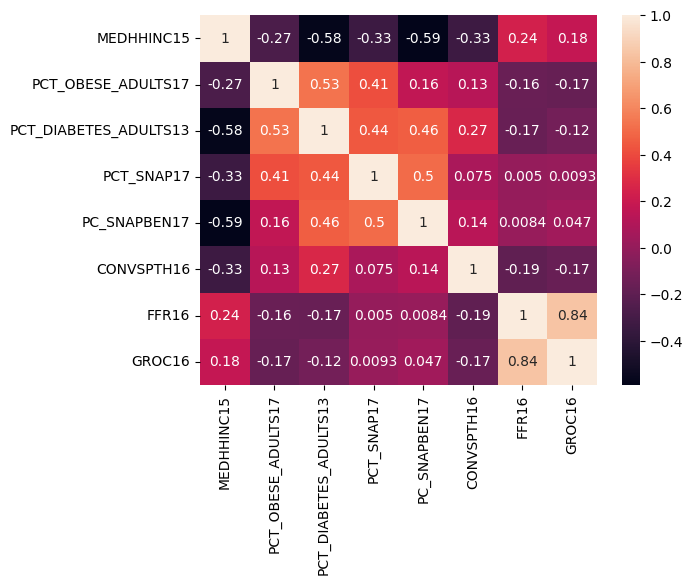

In [ ]:
correlated_vars = final_df[['MEDHHINC15', 'PCT_OBESE_ADULTS17', 'PCT_DIABETES_ADULTS13', 'PCT_SNAP17','PC_SNAPBEN17','CONVSPTH16', 'FFR16', 'GROC16']]
sns.heatmap(correlated_vars.corr(), annot=True)

First, we can look at two plots that compare the median annual household income with the obesity percentage by county and the diabetes percentage by county. The obesity variable is done by state, meaning that there are not specific values for each county, causing the graph to form lines, representing the state as a whole.

The third plot shows the relationship between income and diabetes percentage but uses the obesity percentage as a third factor represented by the plasma "heat" coloration. This can show us that income and diabetes are correlated along with obesity.

R of median household income and state obesity percentage: -0.2746736643258992
R of median household income and county diabetes percentage: -0.5752571563655029


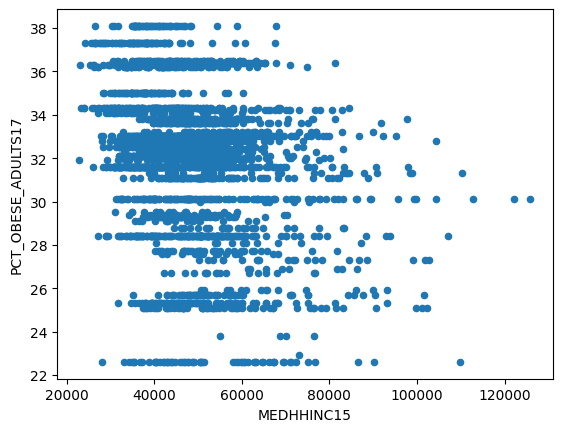

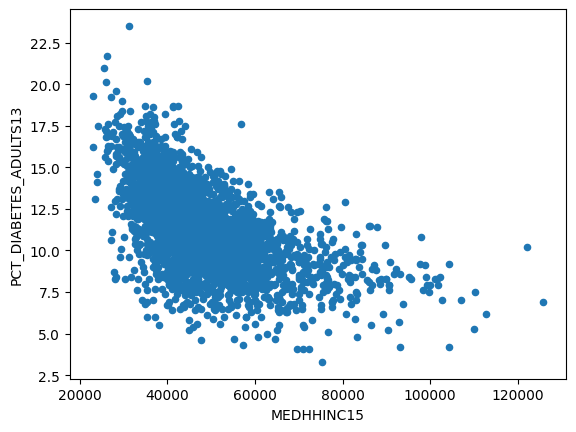

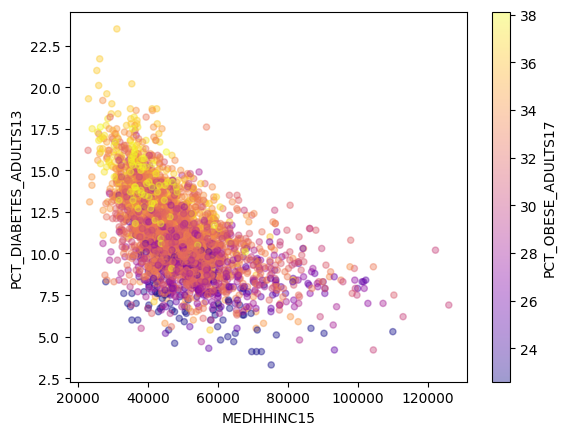

In [ ]:
plot1 = final_df.plot.scatter(x="MEDHHINC15", y="PCT_OBESE_ADULTS17")
plot2 = final_df.plot.scatter(x="MEDHHINC15", y="PCT_DIABETES_ADULTS13")

print("R of median household income and state obesity percentage:", final_df['MEDHHINC15'].corr(final_df['PCT_OBESE_ADULTS17']))
print("R of median household income and county diabetes percentage:", final_df['MEDHHINC15'].corr(final_df['PCT_DIABETES_ADULTS13']))

plot3 = final_df.plot.scatter(x="MEDHHINC15", y="PCT_DIABETES_ADULTS13",
                     c="PCT_OBESE_ADULTS17", cmap="plasma", alpha=.4);

Next, we begin looking at percentage of population on SNAP (supplemental nutrition assistance program) and median household income per county. In the first graph, we use the percentage of a state's population that is on snap, hence the striation seen.

For the second plot, we switched to a measure of SNAP benefits per capita, which is measured per county.

R of median household income and state SNAP percentage: -0.3349323623222896
R of median household income and state SNAP percentage: -0.5891344473023479


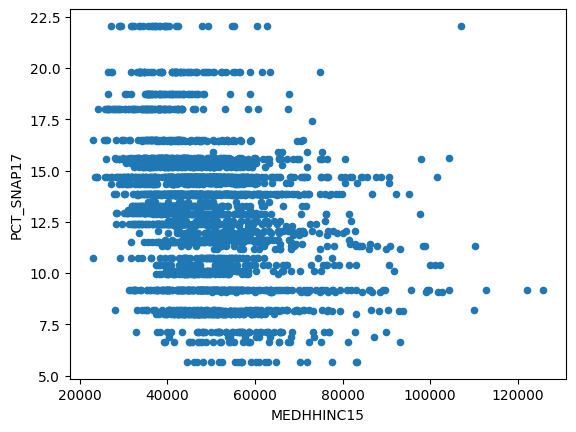

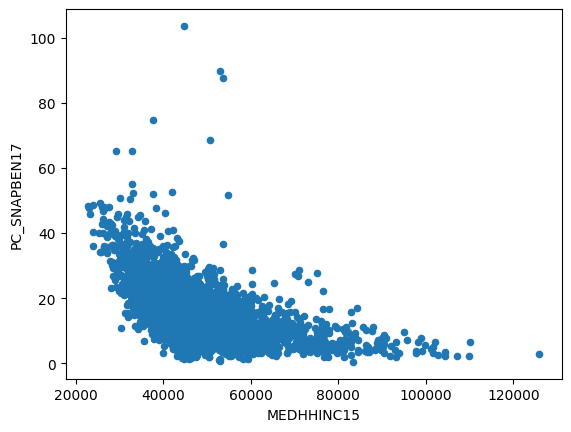

In [ ]:
#income against SNAP particiants (%)
print("R of median household income and state SNAP percentage:", final_df['MEDHHINC15'].corr(final_df['PCT_SNAP17']))

plot1 = final_df.plot.scatter(x="MEDHHINC15", y="PCT_SNAP17")

print("R of median household income and state SNAP percentage:", final_df['MEDHHINC15'].corr(final_df['PC_SNAPBEN17']))
#PCT_SNAP17 is like obesity rate, does not have individual values on counties, only only one value per state
#PC_SNAPBEN17  - SNAP benefits per capita, has individual points per county , try instead
plot  = final_df.plot.scatter(x="MEDHHINC15", y="PC_SNAPBEN17")
# see that SNAP is more prevelant in lower income counties

This graph shows the percentage of adults that have diabetes per county and the per capita SNAP benefits per county. The number of convenience stores per 1000 people per county is shown as third variable.

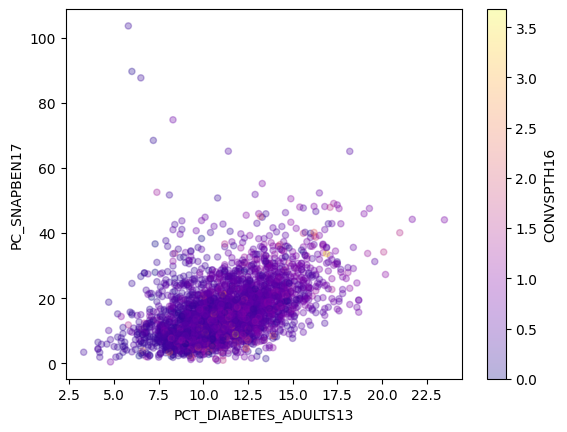

In [ ]:
#obese adults (%) against SNAP participants(%) with color gradient for access to convienent stores
final_df.plot.scatter(x="PCT_DIABETES_ADULTS13", y="PC_SNAPBEN17",
                     c="CONVSPTH16", cmap="plasma", alpha=.3);

Similarly to the above, this shows the number of convenience stores per 1000 people per county and the percentage of obese adults per state.

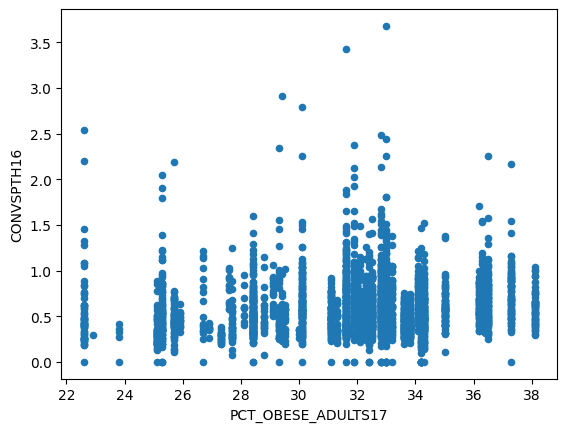

In [ ]:
#Looking at correlation between access to conveinet stores (# per 1000) and obesity.
plot1 = final_df.plot.scatter(x="PCT_OBESE_ADULTS17", y="CONVSPTH16")

Below is a histogram showing the frequency of percentage of obese AND diabetic population occurs when there is more than one convenience store and fast food restaurant per 1000 people.

<Axes: ylabel='Frequency'>

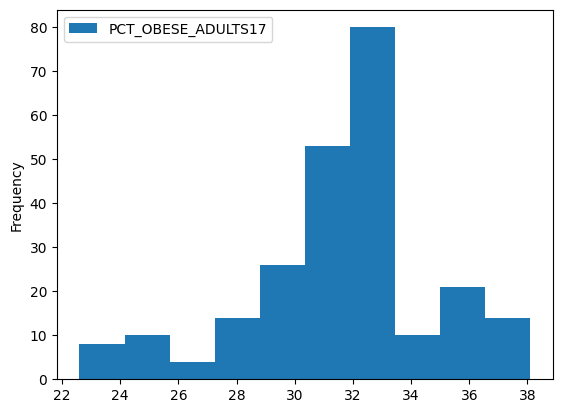

In [ ]:
final_df[final_df.CONVSPTH16 >= 1].PCT_OBESE_ADULTS17.plot.hist(legend = True)

<Axes: ylabel='Frequency'>

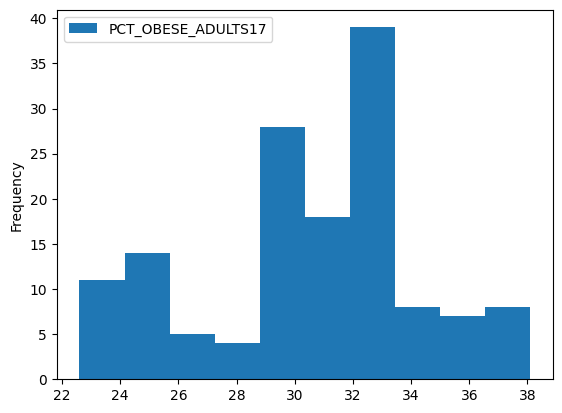

In [ ]:
final_df[final_df.FFRPTH16 >= 1].PCT_OBESE_ADULTS17.plot.hist(legend = True)

In [ ]:
 #building a seperate dataframe to compare income and diabetes
inc_obs = final_df[["State", "County", "PCT_DIABETES_ADULTS13", "MEDHHINC15"]].copy()
inc_obs_sorted = inc_obs.sort_values(by=['State', 'County'], ascending=[True, True])
inc_obs_sorted.loc[final_df["County"]== "Woodson"]
inc_obs_sorted


,State,County,PCT_DIABETES_ADULTS13,MEDHHINC15
0,Alabama,Autauga,13.0,56580.0
1,Alabama,Baldwin,10.4,52387.0
2,Alabama,Barbour,18.4,31433.0
3,Alabama,Bibb,14.8,40767.0
4,Alabama,Blount,14.1,50487.0
...,...,...,...,...
3140,Wyoming,Uinta,9.0,62968.0
3141,Wyoming,Washakie,12.0,56088.0
3119,Wyoming,Wood,8.1,51025.0
3142,NaN,Weston,10.0,60986.0


In [ ]:
#Average income by state level
df_reset = final_df.reset_index()
avg_income_by_state = df_reset.groupby('State')['MEDHHINC15'].mean()
avg_income_by_state


State
 Alabama                 39830.104478
 Alaska                  61646.178571
 Arizona                 44016.733333
 Arkansas                38592.680000
 California              57650.931034
 Colorado                53810.531250
 Connecticut             72445.125000
 Delaware                58722.000000
 District of Columbia    73115.000000
 Florida                 45390.358209
 Georgia                 42510.314465
 Hawaii                  67566.000000
 Idaho                   46685.295455
 Illinois                52188.068627
 Indiana                 50966.684783
 Iowa                    53144.878788
 Kansas                  49375.761905
 Kentucky                41152.041667
 Louisiana               42974.562500
 Maine                   46777.625000
 Maryland                68852.208333
 Massachusetts           67472.785714
 Michigan                46487.626506
 Minnesota               55764.965517
 Mississippi             36834.792683
 Missouri                43271.765217
 Monta

In [ ]:
#Looking at the bottom 25% of median income by county
quant = (inc_obs_sorted["MEDHHINC15"].quantile(.25))
print("bottom 25% of income is:", quant)
bot_25_inc = inc_obs_sorted[inc_obs_sorted['MEDHHINC15'] <= quant]
print(bot_25_inc)

bottom 25% of income is: 40438.0
               State     County  PCT_DIABETES_ADULTS13  MEDHHINC15
2            Alabama    Barbour                   18.4     31433.0
5            Alabama    Bullock                   19.6     28251.0
6            Alabama     Butler                   17.7     33868.0
8            Alabama   Chambers                   16.4     35560.0
9            Alabama   Cherokee                   13.3     39144.0
...              ...        ...                    ...         ...
3042   West Virginia      Wayne                   16.5     35537.0
3043   West Virginia    Webster                   16.7     30673.0
3049       Wisconsin    Ashland                   11.0     40163.0
3087       Wisconsin  Menominee                   13.9     33410.0
3047       Wisconsin    Wyoming                   14.9     35020.0

[785 rows x 4 columns]


The above table shows the counties that are the bottom 25% of median household income or below.

The below table does the same for top 25%.

In [ ]:
#looking at top 25% of diabetes by county
quant = (inc_obs_sorted["PCT_DIABETES_ADULTS13"].quantile(.75))
print("top 25% of diabetes is:", quant)
top_25_dbt = inc_obs_sorted[inc_obs_sorted['PCT_DIABETES_ADULTS13'] >= quant]
print(top_25_dbt)

top 25% of diabetes is: 12.9
               State     County  PCT_DIABETES_ADULTS13  MEDHHINC15
0            Alabama    Autauga                   13.0     56580.0
2            Alabama    Barbour                   18.4     31433.0
3            Alabama       Bibb                   14.8     40767.0
4            Alabama     Blount                   14.1     50487.0
5            Alabama    Bullock                   19.6     28251.0
...              ...        ...                    ...         ...
3044   West Virginia     Wetzel                   13.0     41833.0
3045   West Virginia       Wirt                   14.8     42309.0
3046   West Virginia       Wood                   14.0     41133.0
3087       Wisconsin  Menominee                   13.9     33410.0
3047       Wisconsin    Wyoming                   14.9     35020.0

[791 rows x 4 columns]


Here, we perform an inner join on the top 25% highest diabetes rates and bottom 25% of median household incomes. This shows us how many counties occupy both regions, giving us insight into the potential relationship here.

In [ ]:
#Doing an 'Inner Join" on these two series, 'bottom 25% income' and 'top 25% diabetes rates'
#This inner join will show the Counties that share both the 'bottom 25% income' and 'top 25% diabetes rates' qualities,
# giving us a good vision of how these two qualities have much overlap
bot_25_inc
top_bot_merged = pd.merge(bot_25_inc, top_25_dbt, left_index=True, right_index=True, how='inner')
top_bot_merged

,State_x,County_x,PCT_DIABETES_ADULTS13_x,MEDHHINC15_x,State_y,County_y,PCT_DIABETES_ADULTS13_y,MEDHHINC15_y
2,Alabama,Barbour,18.4,31433.0,Alabama,Barbour,18.4,31433.0
5,Alabama,Bullock,19.6,28251.0,Alabama,Bullock,19.6,28251.0
6,Alabama,Butler,17.7,33868.0,Alabama,Butler,17.7,33868.0
8,Alabama,Chambers,16.4,35560.0,Alabama,Chambers,16.4,35560.0
9,Alabama,Cherokee,13.3,39144.0,Alabama,Cherokee,13.3,39144.0
...,...,...,...,...,...,...,...,...
3039,West Virginia,Tucker,13.8,38000.0,West Virginia,Tucker,13.8,38000.0
3042,West Virginia,Wayne,16.5,35537.0,West Virginia,Wayne,16.5,35537.0
3043,West Virginia,Webster,16.7,30673.0,West Virginia,Webster,16.7,30673.0
3087,Wisconsin,Menominee,13.9,33410.0,Wisconsin,Menominee,13.9,33410.0


Between the two joined dataframes, there were 1576 rows of data, and 478 of them were in both the top 25% of obesity rates and bottom 25% of median household incomes.

Finally, we look now at various ranges of median household income and the average obesity rate there. As income decrease, obesity rate increases.

In [ ]:
# Take numbers from different levels of income and see how obesity changes as the range of income changes
#
(final_df[final_df.MEDHHINC15 <= 90000]['PCT_OBESE_ADULTS17'].mean(),
 final_df[final_df.MEDHHINC15 <= 50000]['PCT_OBESE_ADULTS17'].mean(),
 final_df[final_df.MEDHHINC15 <= 30000]['PCT_OBESE_ADULTS17'].mean())

(31.90038659793815, 32.38967674661106, 34.39848484848484)

Moving into the future, we plan to look at more factors that might have a correlation with the two target health outcomes, obesity and diabetes. There is such a high volume of data available that it will take us some time to look at every factor, but for now, we feel we have a good base to work from.


For models, we have discussed predicting health outcomes for a person based on factors such as household income, access to gyms, frequency of different food vendors, and possibly others. A k nearest neighbors regression seems well-suited for this task.

A second model we'd like to develop is a polynomial regression for median household income and the diabetes rate. We have the graph already, so this would be a good starting point to get into modeling data.